In [1]:
from sklearn import datasets as ds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
class LogisticRegression:
    def __init__(self):
        #self.built = False
        pass
    
    def fit(self, X, y, loss_function, accuracy_func, epochs=1, learning_rate=0.1):
        ## Weight initialization
        #if not self.built:
        self.W = np.random.normal(size=(X.shape[1],1)) * 0.1
        self.b = np.zeros(shape=(1))
        self.A0 = X
        
            
        y = np.expand_dims(y, axis=-1)
        ## Training
        for epoch in range(epochs):
            
            Z = np.dot(X, self.W) + self.b
            A = 1 / (1 + np.exp(-Z))
            loss = loss_function(y, A)
            preds = np.where(A>0.5,1,0)
            accuracy = accuracy_func(y, preds)
            print(f"Epoch: {epoch+1} Loss: {loss} Accuracy: {accuracy}")
            self.backProp(y, A)
            self.optimize(learning_rate)
            
        
    
    def backProp(self, y, A):
        m = y.shape[0]
        dA = (A - y) / (A * (1-A))
        dZ = A * (1-A) * dA
        self.dW = 1/m * np.dot(self.A0.T, dZ)
        self.db = 1/m * np.sum(dZ, axis=0)        
    
    def optimize(self, lr):
        self.W = self.W - lr*self.dW
        self.b = self.b - lr*self.db
    
    def predict(self, X):
        return np.dot(X, self.W) + self.b
    

In [30]:
def mse(y,y_hat):
    m = y.shape[0]
    
    error = -1/m * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
    return error

def accuracy(y, y_hat):    
    y = np.reshape(y, y_hat.shape)
    assert y.shape == y_hat.shape
    accuracy = np.sum(y==y_hat) / y.shape[0]
    
    return accuracy
    

## Make data

In [39]:
X, y = ds.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                              n_repeated=0, n_classes=2, class_sep=2.0 , random_state=52, )

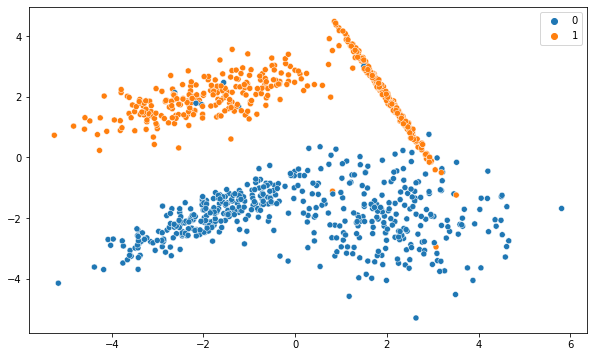

In [40]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [42]:
lr = LogisticRegression()
lr.fit(X, y, loss_function=mse, accuracy_func=accuracy, epochs=100, learning_rate=0.01)

Epoch: 1 Loss: 0.7430021574701012 Accuracy: 0.116
Epoch: 2 Loss: 0.7325480670185868 Accuracy: 0.222
Epoch: 3 Loss: 0.7223344756792609 Accuracy: 0.339
Epoch: 4 Loss: 0.7123561721329873 Accuracy: 0.429
Epoch: 5 Loss: 0.7026079604112992 Accuracy: 0.499
Epoch: 6 Loss: 0.6930846687196633 Accuracy: 0.531
Epoch: 7 Loss: 0.683781157663132 Accuracy: 0.576
Epoch: 8 Loss: 0.6746923278719545 Accuracy: 0.647
Epoch: 9 Loss: 0.6658131270295269 Accuracy: 0.711
Epoch: 10 Loss: 0.6571385563094045 Accuracy: 0.78
Epoch: 11 Loss: 0.6486636762319902 Accuracy: 0.816
Epoch: 12 Loss: 0.640383611954908 Accuracy: 0.858
Epoch: 13 Loss: 0.6322935580140171 Accuracy: 0.886
Epoch: 14 Loss: 0.6243887825344924 Accuracy: 0.906
Epoch: 15 Loss: 0.6166646309334385 Accuracy: 0.925
Epoch: 16 Loss: 0.609116529137124 Accuracy: 0.931
Epoch: 17 Loss: 0.6017399863371551 Accuracy: 0.939
Epoch: 18 Loss: 0.5945305973107717 Accuracy: 0.948
Epoch: 19 Loss: 0.5874840443309993 Accuracy: 0.953
Epoch: 20 Loss: 0.5805960986926232 Accuracy:

In [73]:
lr.b

array([0.92831161])